# Collaborative Filtering

### 1-a 

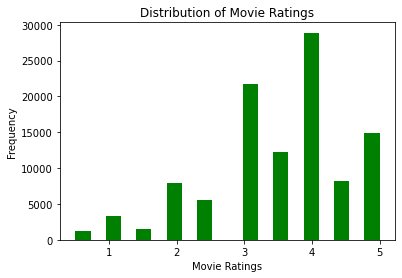

In [16]:
# Loading Libraries for importing dataset and plotting histogram
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv(r'/Users/sakshamjain/Desktop/ratings.csv')

# Extracting the 'rating' column from the dataset
rating = df['rating']

# Plotting a histogram of the 'rating' column 
# Set the labels of histogram
plt.hist(rating, bins=20, color='green')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Movie Ratings')
plt.ylabel('Frequency')

# Loading Libraries for importing dataset and plotting histogram
plt.show()

### 1-b

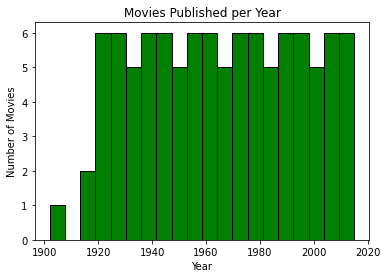

In [17]:
# Loading Libraries for importing dataset and plotting histogram
import pandas as pd
import matplotlib.pyplot as plt

# Load the movies dataset into a pandas dataframe
movies = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')

# Extract the release year from the movie title
movies['release_year'] = movies['title'].str.extract('\((\d{4})\)', expand=False)

# Count the number of movies released each year
movies_per_year = movies['release_year'].value_counts()

# Sort the movie counts by year in ascending order
movies_per_year = movies_per_year.sort_index()

# Plot the histogram of movies published per year
plt.hist(movies_per_year.index.astype(int), bins=20, color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Published per Year')

# Loading Libraries for importing dataset and plotting histogram
plt.show()


### 1-c

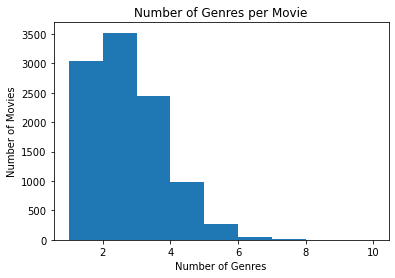

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the movie dataset into a pandas dataframe
df = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')

# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Create a list to store the counts of each genre
genre_counts = []

# Iterate through each row in the dataframe
for genres in df['genres']:
    # Append the count of genres in each row to the genre_counts list
    genre_counts.append(len(genres))

# Create a histogram using the genre counts using pyplot library
plt.hist(genre_counts, bins=len(set(genre_counts)))

# Set the title and labels of the histogram plot
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')

# Display the plot
plt.show()


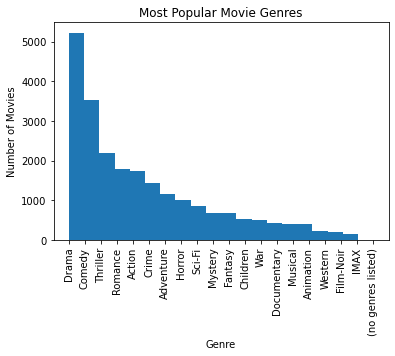

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Loading the movie dataset into a pandas dataframe
df = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')

# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Create a dictionary to count the occurrences of each genre
genre_counts = {}
for genres in df['genres']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert the dictionary to a pandas series and sort by descending order
genre_counts = pd.Series(genre_counts).sort_values(ascending=False)

# Create a histogram using the genre counts using pyplot library
plt.hist(genre_counts.index, bins=len(genre_counts), weights=genre_counts.values)

# Set the title and labels of the histogram plot
plt.title('Most Popular Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

# Rotate the x-axis labels for better visualisation
plt.xticks(rotation=90)

# Display the plot
plt.show()


### 1-d 

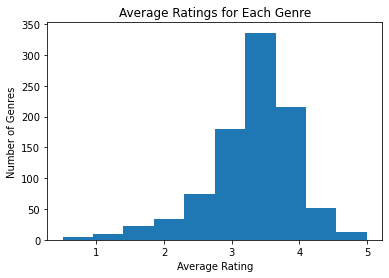

In [20]:
# Loading Libraries for importing dataset and plotting histogram
import pandas as pd
import matplotlib.pyplot as plt

# Load the movies dataset into a pandas dataframe
movies = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')

# Load the ratings dataset into a pandas dataframe
ratings = pd.read_csv(r'/Users/sakshamjain/Desktop/ratings.csv')

# Merge the movies and ratings dataframes
movie_ratings = pd.merge(movies, ratings, on='movieId')

# Calculate the average rating for each genre
genre_ratings = movie_ratings.groupby('genres')['rating'].mean()

# Plot the histogram graph of the average ratings for each genre
plt.hist(genre_ratings.values, bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Genres')
plt.title('Average Ratings for Each Genre')

# Loading Libraries for importing dataset and plotting histogram
plt.show()


### 1-e 

In [21]:
# Loading Libraries for importing dataset 
import pandas as pd

# Load the ratings and movies datasets into pandas dataframes
ratings = pd.read_csv(r'/Users/sakshamjain/Desktop/ratings.csv')
movies = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')

# Merge the ratings and movies dataframes
movie_ratings = pd.merge(movies, ratings, on='movieId')

# Pivot the table to get the user ratings for each movie
pivot_table = movie_ratings.pivot_table(index='userId', columns='title', values='rating')

# Get the ratings for "Pulp Fiction (1994)"
pulp_fiction_ratings = pivot_table['Pulp Fiction (1994)']

# Calculate the Pearson's R correlation between the ratings of each pair of movies
correlations = pivot_table.corrwith(pulp_fiction_ratings)

# Drop NaN values and drop the "Pulp Fiction (1994)" row from the correlation results
correlations = correlations.dropna().drop('Pulp Fiction (1994)')

# Get the top 10 movies with highest correlations
top_10_movies = correlations.sort_values(ascending=False).head(10)

# Print the recommended movies with their correlation values
for i, (movie_title, correlation) in enumerate(top_10_movies.items(), start=1):
    print(f"{i}: {movie_title} (correlation: {correlation:.2f})")


/Users/sakshamjain/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sakshamjain/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


1: Total Eclipse (1995) (correlation: 1.00)
2: Flower of My Secret, The (La flor de mi secreto) (1995) (correlation: 1.00)
3: Public Enemy, The (1931) (correlation: 1.00)
4: Prophecy II, The (1998) (correlation: 1.00)
5: Producers, The (2005) (correlation: 1.00)
6: Frantic (1988) (correlation: 1.00)
7: Free Enterprise (1998) (correlation: 1.00)
8: Friday the 13th (2009) (correlation: 1.00)
9: Postal (2007) (correlation: 1.00)
10: Friends & Lovers (1999) (correlation: 1.00)


# 1-f

In [22]:
# Loading Libraries for importing dataset and plotting histogram and creating the matrix
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Load the movie and ratings datasets into pandas dataframes
movies = pd.read_csv(r'/Users/sakshamjain/Desktop/movies.csv')
ratings = pd.read_csv(r'/Users/sakshamjain/Desktop/ratings.csv')

# Merge the movie and ratings dataframes
movie_ratings = pd.merge(movies, ratings, on='movieId')

# Create a pivot table of movie ratings
pivot_table = movie_ratings.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)

# Convert the pivot table to a sparse matrix
sparse_matrix = csr_matrix(pivot_table.values)

# Fit the K-Nearest Neighbor model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(sparse_matrix)

# Get the index of the 'Jumanji' movie
jumanji_index = movies[movies['title'] == 'Jumanji (1995)'].index[0]

# Find the 10 most similar movies to 'Jumanji'
distances, indices = knn_model.kneighbors(sparse_matrix[jumanji_index], n_neighbors=11)

# Print the recommended movies
for i, recommended_movie_index in enumerate(indices.flatten()[1:], start=1):
    recommended_movie_title = movies.iloc[recommended_movie_index]['title']
    print(f"{i}: {recommended_movie_title}")


1: Lion King, The (1994)
2: Home Alone (1990)
3: Mrs. Doubtfire (1993)
4: Mask, The (1994)
5: Speed (1994)
6: Batman (1989)
7: Jurassic Park (1993)
8: Batman Forever (1995)
9: Truman Show, The (1998)
10: Aladdin (1992)


### 2-a 

In [23]:
# Loading Libraries for importing dataset
import pandas as pd

#Loading library for feature extraction using tf - idf
from sklearn.feature_extraction.text import TfidfVectorizer

# loading library for calculating cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Load both of datasets
df_credits = pd.read_csv('/Users/sakshamjain/Desktop/tmdb_5000_credits.csv')
df_movies = pd.read_csv('/Users/sakshamjain/Desktop/tmdb_5000_movies.csv')

# Extract the 'overview' text of all the movies and handle missing values
df_movies['overview'] = df_movies['overview'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['overview'])

# Compute the similarity between 'Avatar' and all the other movies
avatar_idx = df_movies[df_movies['title'] == 'Avatar'].index[0]
cosine_similarities = cosine_similarity(tfidf_matrix[avatar_idx], tfidf_matrix).flatten()

# Sort the similarity scores in descending order and select the top-10 movies
similar_movies_indices = cosine_similarities.argsort()[::-1][1:11]
similar_movies = df_movies.iloc[similar_movies_indices]['title'].values

# Print the recommended movies
print("Top 10 movies similar to 'Avatar'. \n")
for i in similar_movies:
    print(i + "\n")


Top 10 movies similar to 'Avatar'. 

Apollo 18

The American

The Matrix

The Inhabited Island

Tears of the Sun

Hanna

The Adventures of Pluto Nash

Semi-Pro

Supernova

Blood and Chocolate

